# Data Project - Stock Market Analysis 



In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','NVDA','TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','NVDA','TSLA']

end = datetime.now()
print ('end',end)

start = datetime(end.year - 1, end.month, end.day)
print ('start',start)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


end 2022-11-23 15:17:45.245597
start 2021-11-23 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN, NVDA,TSLA ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","NVIDIA", "TESLA"]

for company, com_name in zip(company_list, company_name): #creat company_name column
    company["company_name"] = com_name


df = pd.concat(company_list, axis=0)
print (df.tail(10))
print (df.head(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-11-09  190.779999  195.889999  177.119995  177.589996  177.589996   
2022-11-10  189.899994  191.000000  180.029999  190.720001  190.720001   
2022-11-11  186.000000  196.520004  182.589996  195.970001  195.970001   
2022-11-14  192.770004  195.729996  186.339996  190.949997  190.949997   
2022-11-15  195.880005  200.820007  192.059998  194.419998  194.419998   
2022-11-16  191.509995  192.570007  185.660004  186.919998  186.919998   
2022-11-17  183.960007  186.160004  180.899994  183.169998  183.169998   
2022-11-18  185.050003  185.190002  176.550003  180.190002  180.190002   
2022-11-21  175.850006  176.770004  167.539993  167.869995  167.869995   
2022-11-22  168.630005  170.919998  166.190002  169.910004  169.910004   

               Volume company_name  
Date                                
2022-11-09  127062700        TESLA  


In [5]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.030397,160.216230,155.969405,158.172421,157.615200,9.119690e+07
std,12.844103,12.657985,12.885869,12.777798,12.570723,2.592477e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,5.121820e+07
25%,147.162502,149.844997,145.177502,147.997498,147.885014,7.363840e+07
50%,159.470001,161.495003,156.340004,158.715004,158.053680,8.659620e+07
75%,169.232502,171.057503,167.220001,168.970005,168.350849,1.024875e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-23 to 2022-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


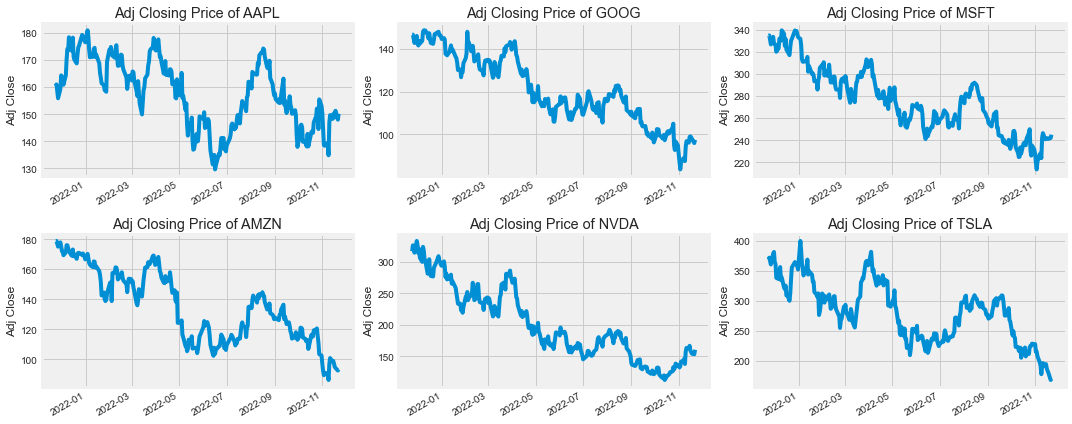

In [7]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Adj Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()

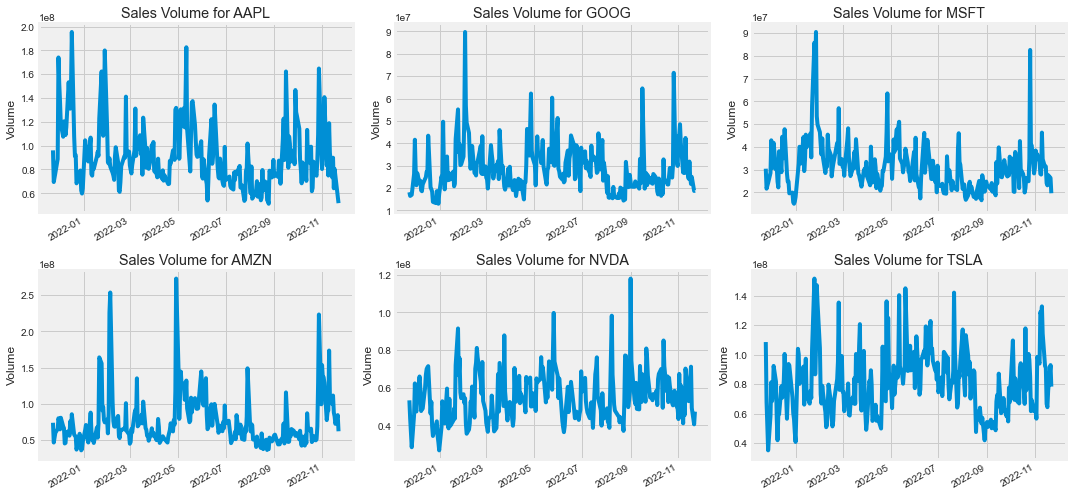

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

In [11]:
#df.groupby("company_name").hist(figsize=(12, 12));

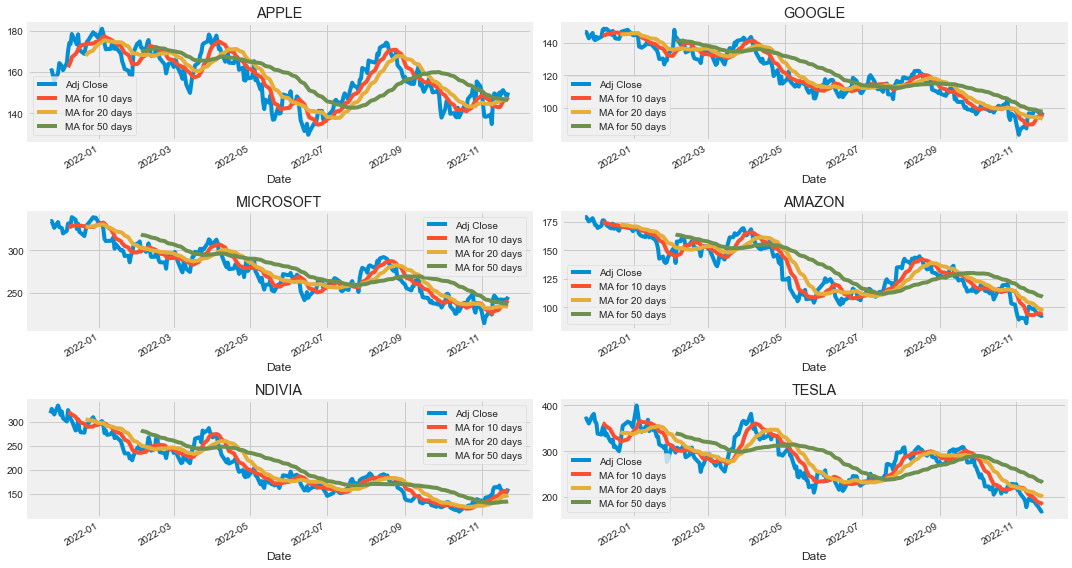

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NDIVIA')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('TESLA')


fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

>Daily return on a stock is used to measure the day to day performance of stocks, **it is the price of stocks at today's closure compared to the price of the same stock at yesterday's closure**. Positive daily return means appreciation in stock price on daily comparison.

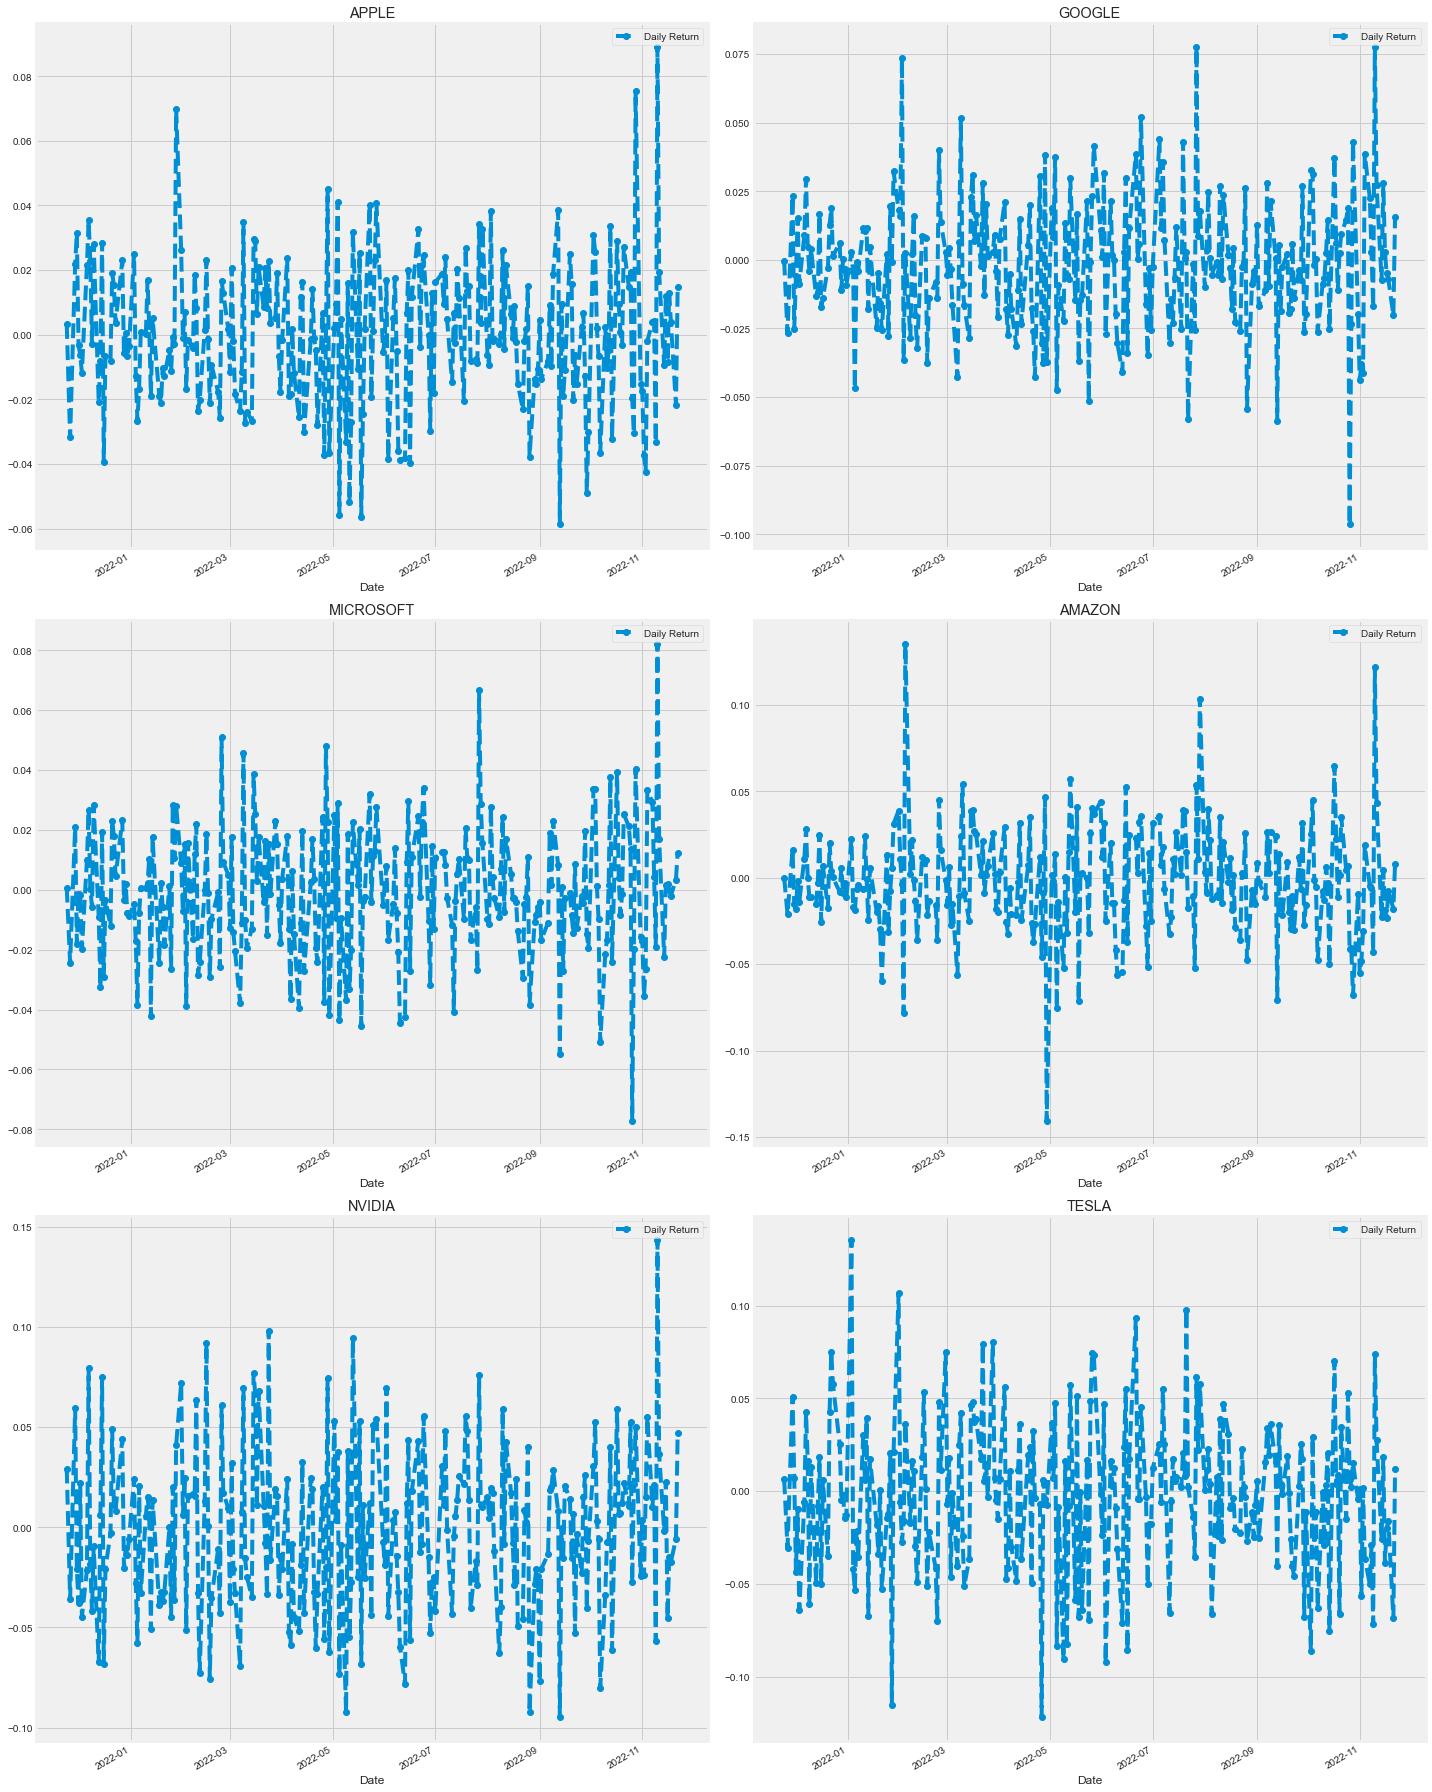

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(25)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

NVDA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('NVIDIA')

TSLA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('TESLA')

fig.tight_layout()

In [14]:
#TSLA.describe()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

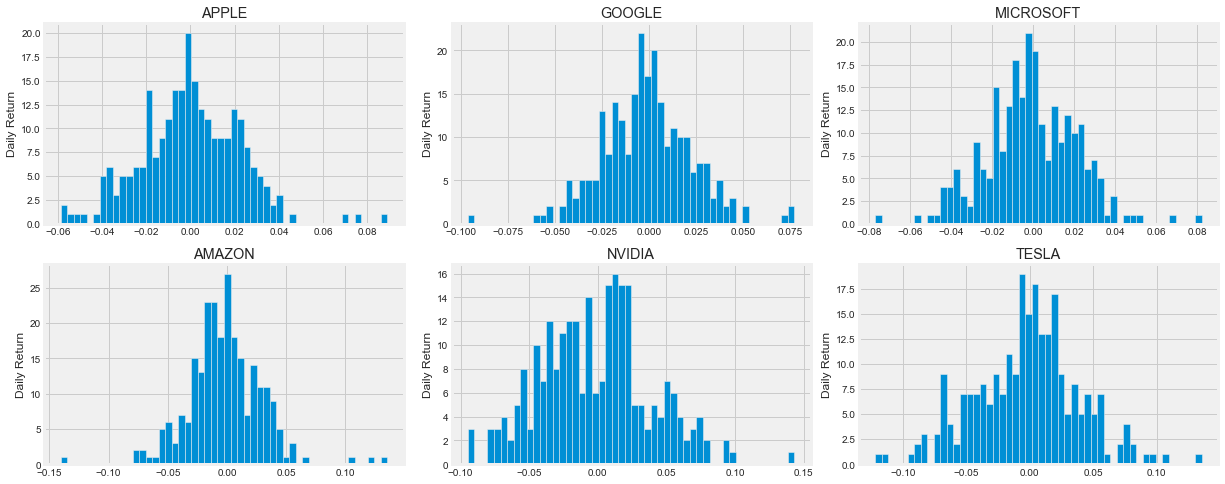

In [15]:
plt.figure(figsize=(17, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.tail(10) 

Symbols,AAPL,GOOG,MSFT,AMZN,NVDA,TSLA
Date,,,,,,
2022-11-09,134.869995,87.400002,223.879074,86.139999,137.759995,177.589996
2022-11-10,146.869995,94.169998,242.297165,96.629997,157.500000,190.720001
2022-11-11,149.699997,96.730003,246.415558,100.790001,163.270004,195.970001
2022-11-14,148.279999,96.029999,240.871185,98.489998,162.949997,190.949997
2022-11-15,150.039993,98.720001,241.290009,98.940002,166.660004,194.419998
2022-11-16,148.789993,98.989998,241.729996,97.120003,159.100006,186.919998
2022-11-17,150.720001,98.500000,241.679993,94.849998,156.770004,183.169998
2022-11-18,151.289993,97.800003,241.220001,94.139999,154.089996,180.190002
2022-11-21,148.009995,95.830002,242.050003,92.459999,153.169998,167.869995


In [17]:
closing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-11-22 to 2022-11-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   GOOG    253 non-null    float64
 2   MSFT    253 non-null    float64
 3   AMZN    253 non-null    float64
 4   NVDA    253 non-null    float64
 5   TSLA    253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [18]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NVDA,TSLA
Date,,,,,,
2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-23,0.002422,-0.002186,-0.006327,0.002091,-0.006572,-0.041353
2021-11-24,0.003283,-0.000269,0.000681,0.000103,0.029232,0.006285
2021-11-26,-0.031678,-0.026660,-0.024356,-0.021185,-0.035839,-0.030538
2021-11-29,0.021874,0.023164,0.021081,0.016267,0.059455,0.050900


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

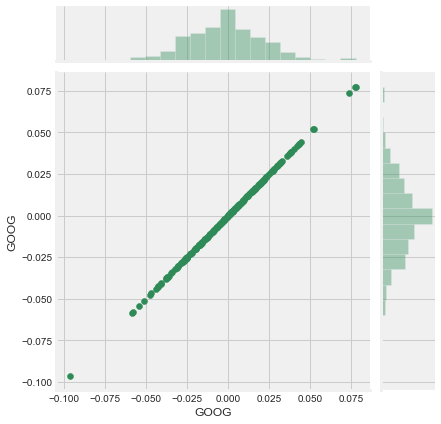

In [19]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

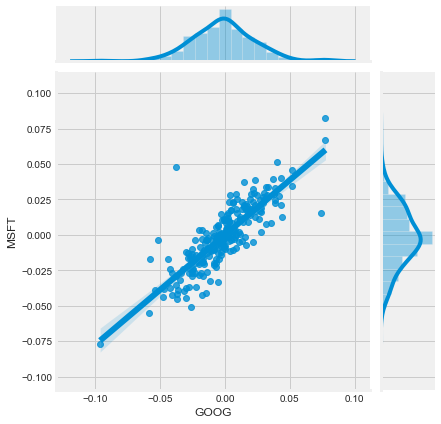

In [20]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='reg')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

#sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

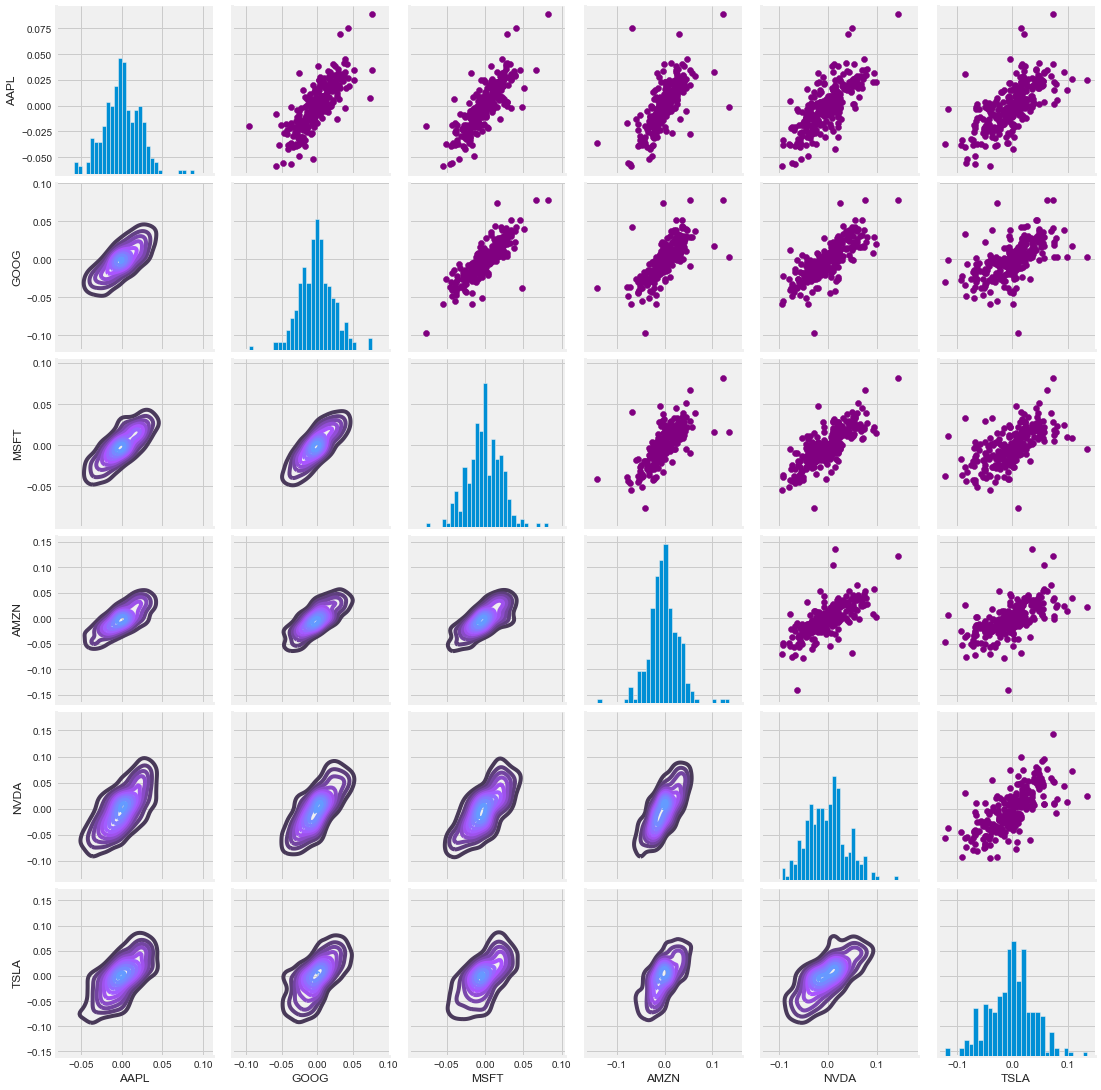

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

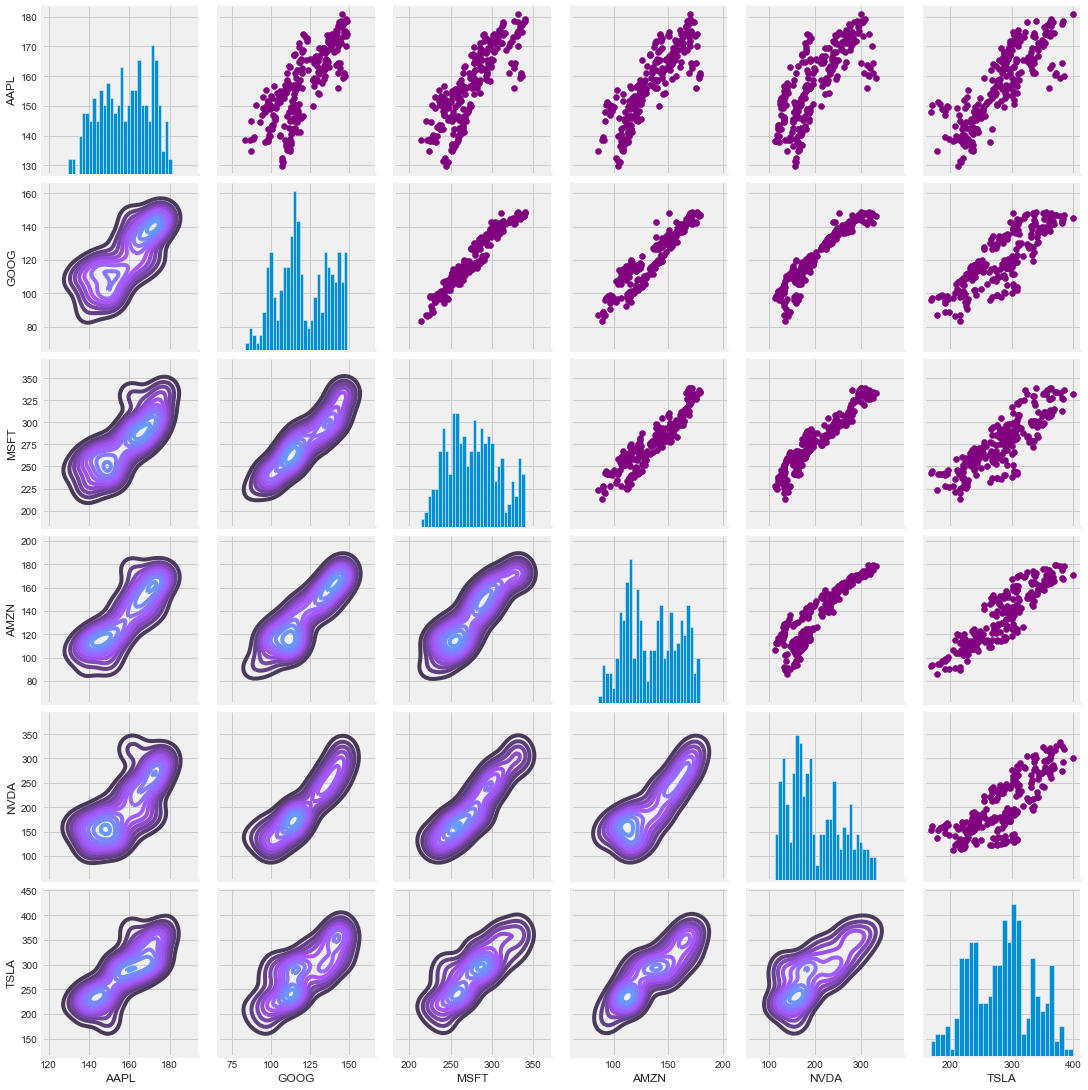

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

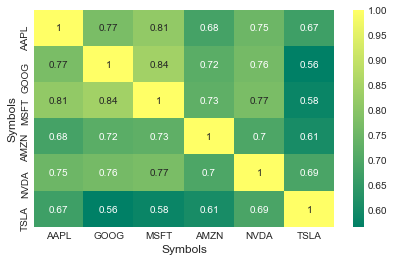

In [24]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

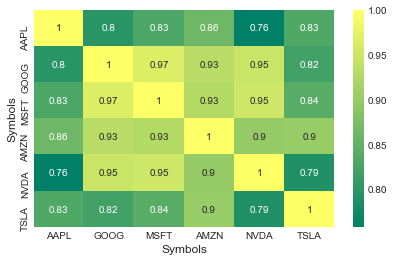

In [25]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return (mean) with the standard deviation (std) of the daily returns.


**[Common Methods of Measurement for Investment Risk Management](https://www.investopedia.com/ask/answers/041415/what-are-some-common-measures-risk-used-risk-management.asp)**

* Standard Deviation
* Sharpe Ratio
* Beta
* Value at Risk (VaR)
* R-squared

Categories of Risks: systematic and unsystematic risks



In [26]:
tech_rets["TSLA"].describe()

count    252.000000
mean      -0.002418
std        0.040696
min       -0.121841
25%       -0.027853
50%       -0.000521
75%        0.020642
max        0.135317
Name: TSLA, dtype: float64

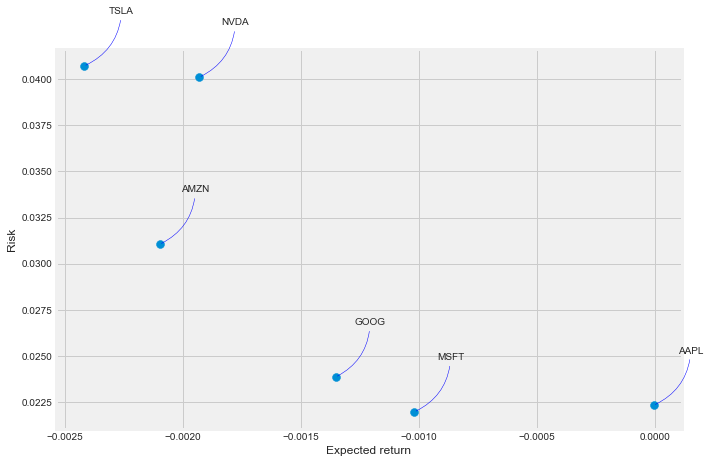

In [27]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna() #remove null values

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

So TSLA is high risk high return, and APPLE is low risk low return and this is accepted

# 6. Predicting the closing price stock price of APPLE inc:

In [28]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519280
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586558
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726294
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859333
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838935


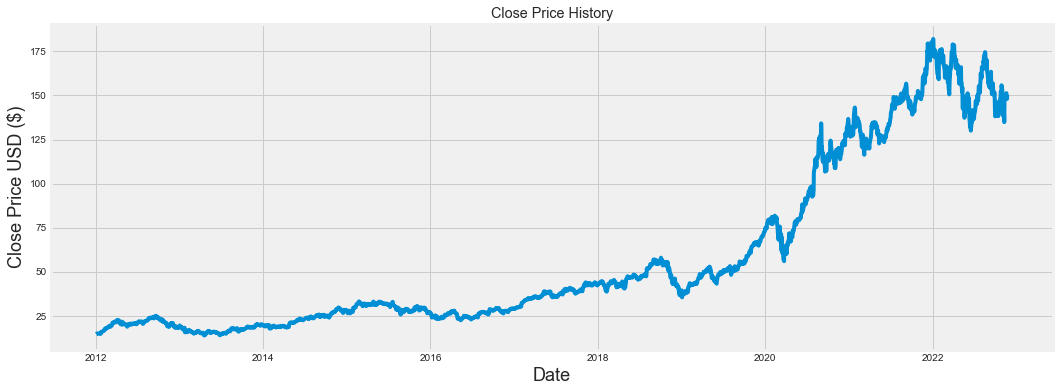

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [30]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

window_size = 60
training_data_len

2605

We won't use minmax_scaler because the close price doesn't have the upper bound (maximum price)

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data


scaled_data.shape 2742


array([[-0.90826039],
       [-0.90660033],
       [-0.90315248],
       ...,
       [ 1.96485827],
       [ 1.89587141],
       [ 1.94151209]])

## Train, test, validation data split

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([-0.90826039, -0.90660033, -0.90315248, -0.89986989, -0.90037317,
       -0.89923892, -0.89975722, -0.90062857, -0.90181542, -0.89814221,
       -0.89482958, -0.89585116, -0.90144735, -0.89610656, -0.90136471,
       -0.88164666, -0.88317151, -0.88118093, -0.87687677, -0.87427024,
       -0.87448808, -0.87529181, -0.87186651, -0.86864403, -0.86499335,
       -0.85909671, -0.84671003, -0.84652224, -0.83962654, -0.83447358,
       -0.84332977, -0.83991951, -0.83998711, -0.83042478, -0.83178441,
       -0.82926803, -0.82474602, -0.82222959, -0.81498086, -0.80970021,
       -0.80817535, -0.807642  , -0.81667097, -0.81884938, -0.81852636,
       -0.81003819, -0.8076495 , -0.80251904, -0.79042533, -0.77429032,
       -0.77731001, -0.77730251, -0.76563692, -0.76198624, -0.76458531,
       -0.76695896, -0.76943029, -0.7612201 , -0.75558634, -0.75322769])]

y_train [-0.7590567358684703]

x_train [array([-0.90826039, -0.90660033, -0.90315248, -0.89986989, -0.90037317,
       -0.89

In [33]:
print (x_train.shape[1])

60


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
    
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)
    
    output = tf.keras.layers.Dense(1, name="last_dense")(x)
               
    model = tf.keras.Model(inputs=input, outputs=output)
    
    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 256)          133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainable

In [35]:
epochs = 100
batch_size = 20
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
128/128 [==============================] - 21s 99ms/step - loss: 0.0357
Epoch 2/100
128/128 [==============================] - 13s 102ms/step - loss: 0.0066
Epoch 3/100
128/128 [==============================] - 13s 99ms/step - loss: 0.0046
Epoch 4/100
128/128 [==============================] - 13s 98ms/step - loss: 0.0037
Epoch 5/100
128/128 [==============================] - 12s 94ms/step - loss: 0.0034
Epoch 6/100
128/128 [==============================] - 12s 96ms/step - loss: 0.0032
Epoch 7/100
128/128 [==============================] - 12s 96ms/step - loss: 0.0036
Epoch 8/100
128/128 [==============================] - 12s 96ms/step - loss: 0.0035
Epoch 9/100
128/128 [==============================] - 12s 97ms/step - loss: 0.0029
Epoch 10/100
128/128 [==============================] - 12s 98ms/step - loss: 0.0031
Epoch 11/100
128/128 [==============================] - 13s 101ms/step - loss: 0.0031
Epoch 12/100
128/128 [==============================] - 13s 101ms/step -

128/128 [==============================] - 14s 107ms/step - loss: 0.0015
Epoch 97/100
128/128 [==============================] - 14s 106ms/step - loss: 0.0020
Epoch 98/100
128/128 [==============================] - 14s 110ms/step - loss: 0.0017
Epoch 99/100
128/128 [==============================] - 13s 105ms/step - loss: 0.0016
Epoch 100/100
128/128 [==============================] - 13s 102ms/step - loss: 0.0018


dict_keys(['loss'])


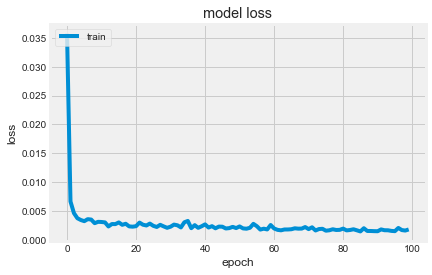

In [36]:
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data): 197
5/5 [==============================] - 2s 40ms/step


4.2804146983621445

<ipython-input-38-aeddc951852c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


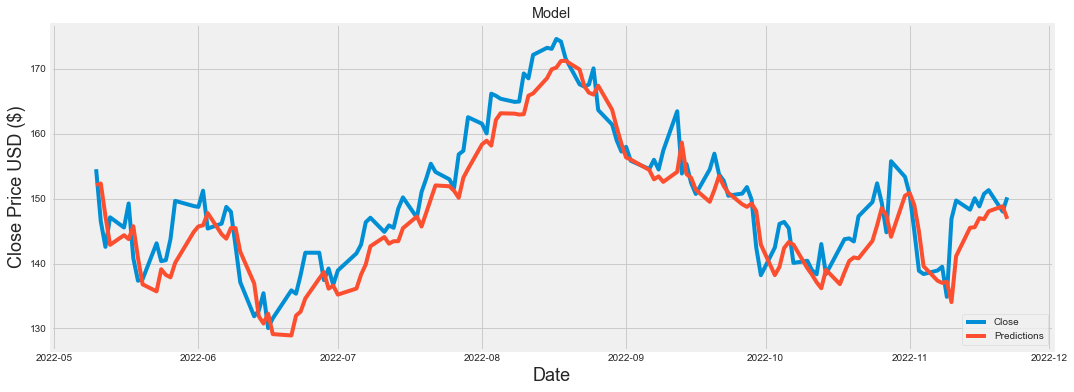

In [38]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Close', 'Predictions'], loc='lower right')
plt.show()

In [39]:
# Show the valid and predicted prices
test

,Close,Predictions
Date,,
2022-05-10,154.509995,152.056778
2022-05-11,146.500000,152.310562
2022-05-12,142.559998,147.306564
2022-05-13,147.110001,142.872314
2022-05-16,145.539993,144.353790
...,...,...
2022-11-16,148.789993,146.980484
2022-11-17,150.720001,146.820847
2022-11-18,151.289993,148.029999
